In [273]:
import pandas as pd
import numpy as np 
import warnings
from summarytools import dfSummary
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [274]:
warnings.filterwarnings('ignore')

## data cleaning

In [275]:
pd.set_option("display.max_columns",100)

In [276]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv"

In [277]:
df = pd.read_csv(path)

In [278]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [279]:
list(df["name"])

['Hyundai Santro Xing XO eRLX Euro III',
 'Mahindra Jeep CL550 MDI',
 'Maruti Suzuki Alto 800 Vxi',
 'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
 'Ford EcoSport Titanium 1.5L TDCi',
 'Ford EcoSport Titanium 1.5L TDCi',
 'Ford Figo',
 'Hyundai Eon',
 'Ford EcoSport Ambiente 1.5L TDCi',
 'Maruti Suzuki Alto K10 VXi AMT',
 'Skoda Fabia Classic 1.2 MPI',
 'Maruti Suzuki Stingray VXi',
 'Hyundai Elite i20 Magna 1.2',
 'Mahindra Scorpio SLE BS IV',
 'Hyundai Santro Xing XO eRLX Euro III',
 'Mahindra Jeep CL550 MDI',
 'Audi A8',
 'Audi Q7',
 'Mahindra Scorpio S10',
 'Maruti Suzuki Alto 800',
 'Mahindra Scorpio S10',
 'Mahindra Scorpio S10',
 'Maruti Suzuki Alto 800 Vxi',
 'Hyundai i20 Sportz 1.2',
 'Hyundai i20 Sportz 1.2',
 'Hyundai i20 Sportz 1.2',
 'Maruti Suzuki Alto 800 Lx',
 'Maruti Suzuki Vitara Brezza ZDi',
 'Maruti Suzuki Alto LX',
 'Mahindra Bolero DI',
 'Maruti Suzuki Swift Dzire ZDi',
 'Mahindra Scorpio S10 4WD',
 'Maruti Suzuki Swift Vdi BSIII',
 'Maruti Suzuki Wagon R VXi BS III',

In [280]:
df["name"].nunique()

525

In [281]:
df = df[df['Price']!='Ask For Price'].reset_index(drop=True)
df['Price'] = df['Price'].str.replace(',', '').astype(int)/100

mask = df['year'].value_counts().index[:20].to_list()
df = df[df['year'].isin(mask)].reset_index(drop=True)
df['year'] = df['year'].astype(int)

df.at[816, 'fuel_type'] = 'Petrol'
df.at[816, 'kms_driven'] = '50000'
df.at[815, 'fuel_type'] = 'Petrol'
df.at[815, 'kms_driven'] = '50000'

df.at[128, 'fuel_type'] = 'Petrol'

df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.replace(' kms', '').astype(int)


In [282]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800.0,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250.0,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250.0,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750.0,36000,Diesel
4,Ford Figo,2012,1750.0,41000,Diesel
...,...,...,...,...,...
812,Toyota Corolla Altis,2009,3000.0,132000,Petrol
813,Tata Zest XM Diesel,2018,2600.0,27000,Diesel
814,Mahindra Quanto C8,2013,3900.0,40000,Diesel
815,Honda Amaze 1.2 E i VTEC,2014,1800.0,50000,Petrol


In [283]:
df = df[df["Price"] < 20000]

In [284]:
#df[df["Price"] > 80000]

In [285]:
#df = df.drop(534, axis=0)

In [286]:
df['brand'] = df['name'].str.split().str[0]

In [287]:
df['old'] = 2024 - df['year']

In [288]:
df = df.drop(columns=['name','year'])

In [289]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Price[float64],Mean (sd) : 3829.6 (3267.0)min < med < max:300.0 < 2990.0 < 19000.0IQR (CV) : 3150.0 (1.2),264 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAChElEQVR4nO3cT4riQBSA8Vdjt5R/SKER3XmBhlkIbjzALPuwcwWhF732Bu6EIAlmFIuQ2UzvmtYkOtZLf799pbL4DAlYz5RlKUDofjz6BoBrPN3z4saYnoh0G1ziXJbl8Vb3A70uhtogNjsej3855wY11oqISJZle2PMb2LFl6EaY3pxHL9GUTSqemHvvRWRl+Vy+T6ZTLKq69M0tW9vb6MkSboiQqjf3KUnajeKotFqtTo6505VLrzdbkebzaZvrfXT6fRPzfvr1VyHlrnqHdU5d6oa236/JzLcDF/9UIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS46wz/poqieBaRyBhTZznz/1sk2FDzPH/23v+cz+edTqdTadq1CPP/2ybYUM/n85O1tr9YLE6z2WxfZS3z/9sn2FA/DAaDymPZ/2E0e4vwMQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoXg/49aV8NjLCIcZQlKK0NteoxFhKMsoWllqE2OsYhwlCVErQz1Q4NjLCIcZQkKH1NQodVP1CaYKRAWQv0EMwXCQ6ifYKZAeAj1C8wUCAeh3sEj32+NMT0R6dZcHuzehHpjj3y/Ncb04jh+jaJoVHVt6HsT6o01fb9dr9fTJEkmxpisxvbRcDicrlarzDlX6Ufy6L0vvddfFWqaprbKxiIih8PBiojkeW53u13/f64PYe86jsdjo6ex994WRfHivX8XkUrrH7n3Nf4CCH5UDDv+fPcAAAAASUVORK5CYII="">",0(0.0%)
2,kms_driven[int32],Mean (sd) : 46485.6 (34353.5)min < med < max:0.0 < 41000.0 < 400000.0IQR (CV) : 30000.0 (1.4),245 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACb0lEQVR4nO3dsY7aQBRG4TsxoAESA9oIOrd0W1DS5A3ysNumh5q3WK2EwAjvsraQ04QoUpSAB1j8o/PV3JGRjrDmNriyLA2ou0+3fgDgFI1jH3DOtc2sFXh+XpblW+As8Nt/Q3XOtR8eHr7HcTwIOXyz2aycc0/EinMd+0VtxXE8mE6nb71eb1fl4DRN/Ww2GyyXy5aZESrOcvTVb2bW6/V2w+HwNeD8dsAM8BcuU5BAqJBw0qs/1H6/b5pZ7JwLPYKtAczsiqFmWdYsiuIxSZIoiqJKF7EDtgY4uFqoeZ43vPedyWSyG41Gq6rzbA3wp6u++s3Mut1u6MbAjK0BfuEyBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECglX/xv0c+z3+6aZxc65kPG8LMu3Cz8SbqS2oWZZ1iyK4jFJkiiKol3V+c1ms3LOPRHrfahtqHmeN7z3nclkshuNRqsqs2ma+tlsNlguly0zI9Q7UNtQD7rd7m44HL4GjLYv/jC4GS5TkECokECokECokFD7y1SoM3ewZuxha+UuQz13B2tmtl6vt865H2YWMk/kF3aXoZ6zgzUze35+/jKfz78lSfI1JHQiv7yTQk3T1Fc9eLvdejOzLMv8y8tL5yPnD7OhiqJoeO874/HY9fv99yqz6/X682KxuFXkyt7Lsvznd/4JccrQGngrXtIAAAAASUVORK5CYII="">",0(0.0%)
3,fuel_type[object],1. Petrol2. Diesel3. LPG,427 (52.8%)380 (47.0%)2 (0.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABnElEQVR4nO3bQW7aYBSF0fcjlDYTWwiJJbR7YBFdbBfhRWQPCOFBk2biDjqOsFTnGug5K3hCn0BGvm2apoKEzdoH8P9oVfVcVU9rH/IA3qdpel37iFu23e/3P7qu2619yL0bx/HcWvspuI9tu67bHY/H177v39Y+5l5dLpevwzDsTqfTU1WJ7QPbqqq+798Oh8OvtY+5c89rH3DrPCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI2Zb9fd9rLUPuWc+v3m24zieh2HYlfex/sk4jueqel/7jltmg7AcG4QrmikfKb7Z5vGttQDrqhksp5ZhXXWF5dRyrKvm8aS+AH/qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiPGuuoKn81yrKtmsJxahg3CPDYIC7CuIsYDAjFiI2bTWvveWvPExafbVNW3qvqy9iE8Pj+jxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI2ZTVS9V9XvtQ3h81lXE+Bkl5g/nRXM62RGPFAAAAABJRU5ErkJggg=="">",0(0.0%)
4,brand[object],1. Maruti2. Hyundai3. Mahindra4. Tata5. Honda6. Toyota7. Chevrolet8. Renault9. Ford10. Volkswagen11. other,220 (27.2%)139 (17.2%)97 (12.0%)65 (8.0%)61 (7.5%)37 (4.6%)35 (4.3%)33 (4.1%)29 (3.6%)19 (2.3%)74 (9.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEEElEQVR4nO3dQWoTYQCG4T8SRDcJpdDD9BAe1kPkNqU0CxU3ceFKTDJmOnlT6fOcYBYvf5nh/5rV4XAYUPhw6wfg/RAbGbGRERsZsZERGxmxkREbGbGRWY0xPo8xPt76Qf7Bz8Ph8P3WD8F86/v7+y+bzebu1g8yZb/fP69Wq6+C+3+tN5vN3ePj4

In [290]:
df

,Price,kms_driven,fuel_type,brand,old
0,800.0,45000,Petrol,Hyundai,17
1,4250.0,40,Diesel,Mahindra,18
2,3250.0,28000,Petrol,Hyundai,10
3,5750.0,36000,Diesel,Ford,10
4,1750.0,41000,Diesel,Ford,12
...,...,...,...,...,...
812,3000.0,132000,Petrol,Toyota,15
813,2600.0,27000,Diesel,Tata,6
814,3900.0,40000,Diesel,Mahindra,11
815,1800.0,50000,Petrol,Honda,10


In [291]:
data = df.copy()

In [292]:
df = pd.get_dummies(df, columns= ["fuel_type","brand"], drop_first=True, dtype=int)

## scelta del modello migliore

In [293]:
df

,Price,kms_driven,old,fuel_type_LPG,fuel_type_Petrol,brand_BMW,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Hindustan,brand_Honda,brand_Hyundai,brand_Jeep,brand_Mahindra,brand_Maruti,brand_Mercedes,brand_Mini,brand_Mitsubishi,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,800.0,45000,17,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4250.0,40,18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3250.0,28000,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5750.0,36000,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1750.0,41000,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,3000.0,132000,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
813,2600.0,27000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
814,3900.0,40000,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
815,1800.0,50000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
X_ = df.drop("Price", axis=1)
y = df["Price"]

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_)

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=667)

### creazione random forest

In [297]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=18, random_state=667)
rf.fit(X_train, y_train)
print(f"train score --> {rf.score(X_train, y_train)}")
print(f"test score --> {rf.score(X_test, y_test)}")

train score --> 0.9344998957475898
test score --> 0.6309675781146402


### creazione regressione lineare

In [298]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"train score --> {lr.score(X_train, y_train)}")
print(f"test score --> {lr.score(X_test, y_test)}")

train score --> 0.7626699288558664
test score --> 0.49069537027675636


### creazione decision tree regressor

In [299]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=667, max_depth=20)
dt.fit(X_train, y_train)
print(f"train score --> {dt.score(X_train, y_train)}")
print(f"test score --> {dt.score(X_test, y_test)}")

train score --> 0.9959388496706257
test score --> 0.44675759674694027


### creazione elastic net


In [300]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
print(f"train score --> {en.score(X_train, y_train)}")
print(f"test score --> {en.score(X_test, y_test)}")

train score --> 0.6290793182340535
test score --> 0.46639905787601255


### creazione ridge

In [301]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train, y_train)
print(f"train score --> {rid.score(X_train, y_train)}")
print(f"test score --> {rid.score(X_test, y_test)}")

train score --> 0.7615615670867215
test score --> 0.49827222204657784


### creazione lasso

In [302]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, y_train)
print(f"train score --> {las.score(X_train, y_train)}")
print(f"test score --> {las.score(X_test, y_test)}")

train score --> 0.7625943856816397
test score --> 0.49326877683810966


### grafici errori

In [303]:
from sklearn.model_selection import cross_val_predict

In [304]:
y_pred = rf.predict(X_test)

In [305]:
models = [rf, lr, dt, en, rid, las ]

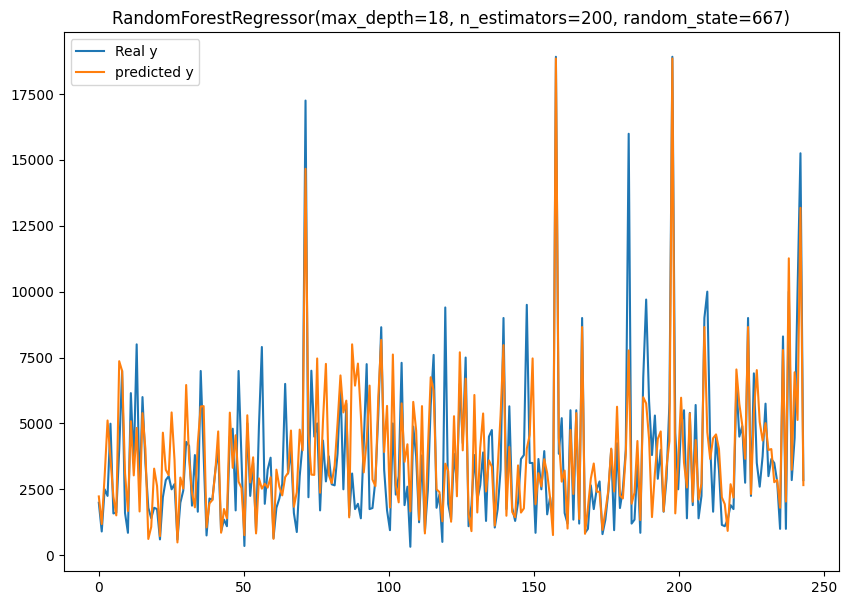

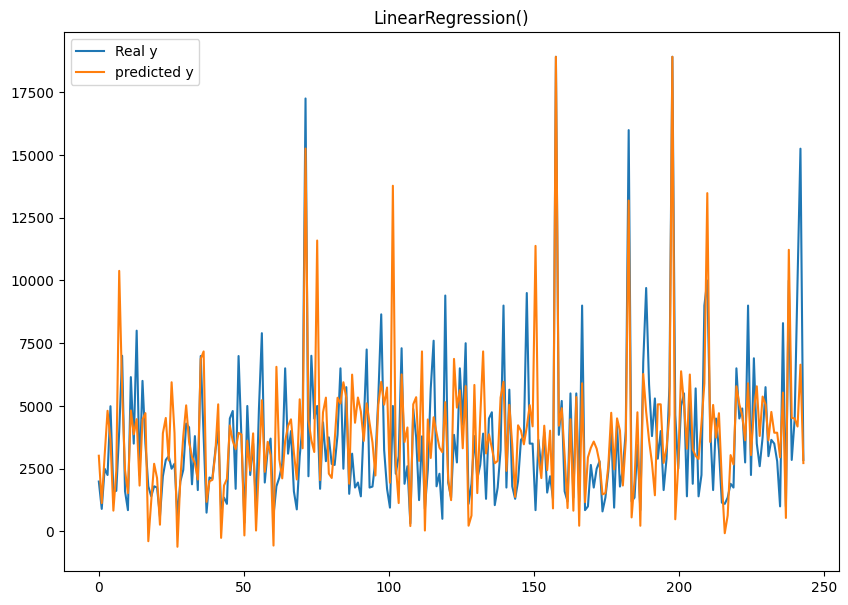

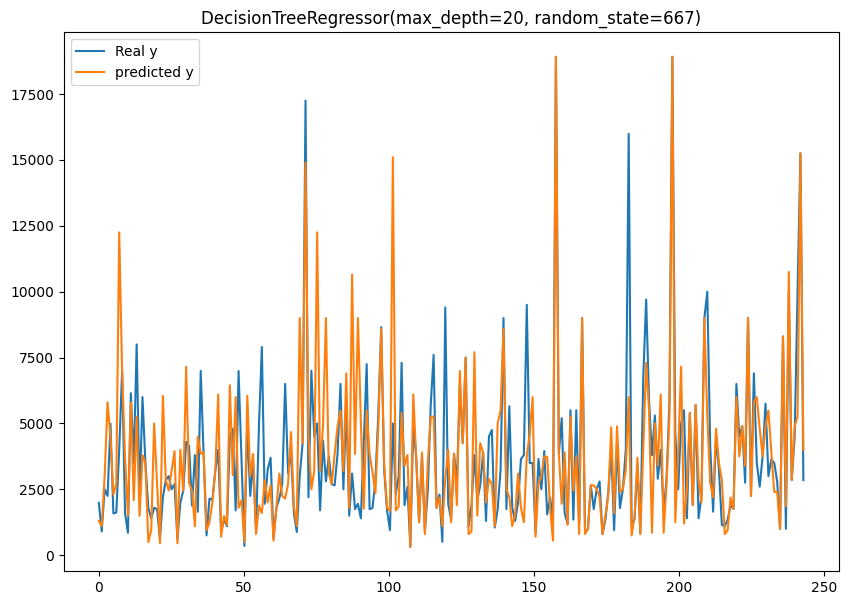

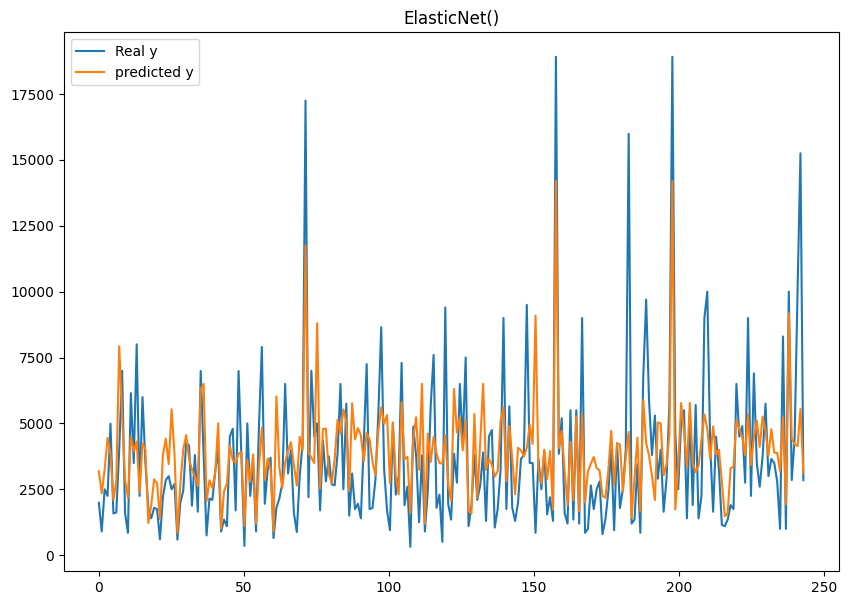

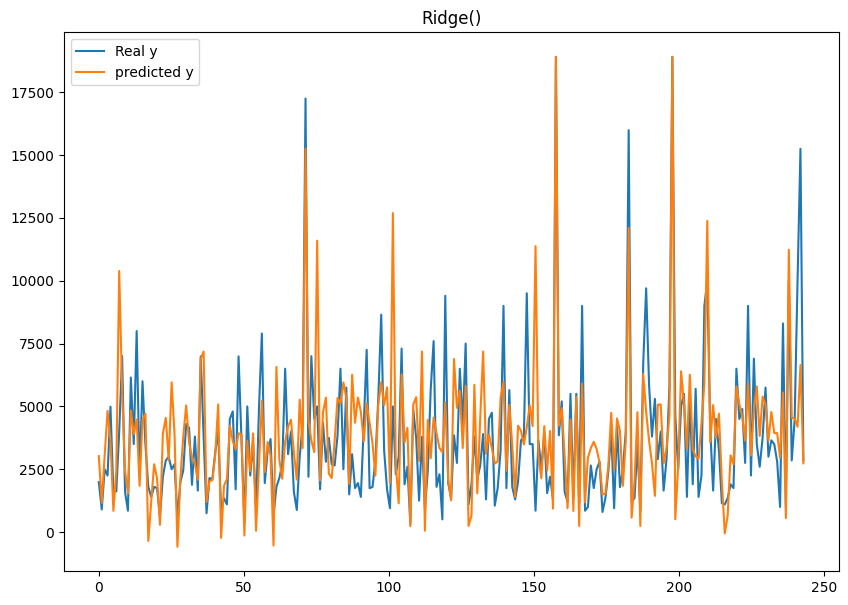

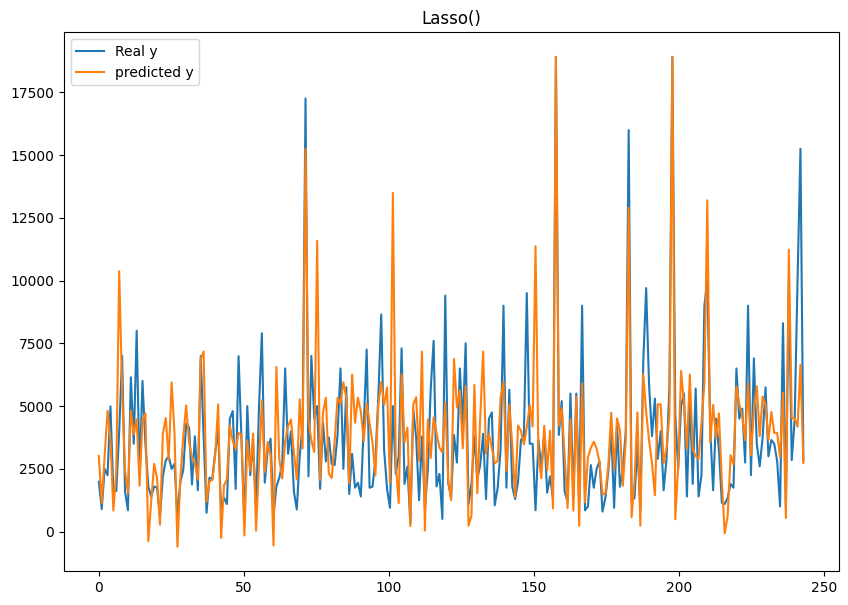

In [306]:
for model in models:
    y_pred = model.predict(X_test)
    lenght = y_pred.shape[0]
    x = np.linspace(0,lenght,lenght)

    plt.figure(figsize=(10,7))
    plt.plot(x, y_test, label="Real y")
    plt.plot(x, y_pred, label="predicted y")
    plt.legend(loc=2)
    plt.title(label=model)
    plt.show()


## modello ridge

In [307]:
from sklearn.model_selection import GridSearchCV

model = Ridge(random_state=667)

param_grid = {
    "alpha": [0.25, 0.30, 0.2, 0.4],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "solver": ["saga",'auto', 'lsqr', 'sparse_cg', 'sag', 'lbfgs'],
    "max_iter": [900, 950, 1000, 1050, 1100]
}

grid_search_ridge = GridSearchCV(estimator=model,
                                 param_grid=param_grid,
                                 cv = 5,
                                 n_jobs = -1,
                                 verbose = 2)

grid_search_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=667), n_jobs=-1,
             param_grid={'alpha': [0.25, 0.3, 0.2, 0.4],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [900, 950, 1000, 1050, 1100],
                         'solver': ['saga', 'auto', 'lsqr', 'sparse_cg', 'sag',
                                    'lbfgs']},
             verbose=2)

In [308]:
from sklearn.model_selection import KFold

In [309]:
grid_search_ridge.best_params_

{'alpha': 0.25,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 900,
 'solver': 'lsqr'}

In [310]:
grid_search_ridge.best_score_

0.7105200914349752

In [311]:
data.columns

Index(['Price', 'kms_driven', 'fuel_type', 'brand', 'old'], dtype='object')

In [312]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

colonne_categ = ["fuel_type", "brand"]
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', drop="first", dtype=int),colonne_categ)
])

In [327]:
{'alpha': 0.25,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 900,
 'solver': 'lsqr'}

{'alpha': 0.25,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 900,
 'solver': 'lsqr'}

In [328]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("standardizzare", StandardScaler(with_mean=False)),
    ("classifier", Ridge(alpha = 0.25,
                        copy_X= True,
                        fit_intercept= True,
                        max_iter= 900,
                        solver= "lsqr"))
])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['fuel_type', 'brand'])])),
                ('standardizzare', StandardScaler(with_mean=False)),
                ('classifier', Ridge(alpha=0.25, max_iter=900, solver='lsqr'))])

In [335]:
X_ = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=667)

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 816
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       809 non-null    float64
 1   kms_driven  809 non-null    int32  
 2   fuel_type   809 non-null    object 
 3   brand       809 non-null    object 
 4   old         809 non-null    int32  
dtypes: float64(1), int32(2), object(2)
memory usage: 31.6+ KB


In [337]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['fuel_type', 'brand'])])),
                ('standardizzare', StandardScaler(with_mean=False)),
                ('classifier', Ridge(alpha=0.25, max_iter=900, solver='lsqr'))])

In [338]:
pipe.score(X_train, y_train)

0.6574103710949735

In [339]:
pipe.fit(X_,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['fuel_type', 'brand'])])),
                ('standardizzare', StandardScaler(with_mean=False)),
                ('classifier', Ridge(alpha=0.25, max_iter=900, solver='lsqr'))])

In [340]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [341]:
cross_val_score(pipe, X_,y, cv=5).mean()

0.4943105656536394

In [342]:
import joblib 
joblib.dump(pipe, "pipe_ridge_cars.pkl")

['pipe_ridge_cars.pkl']

In [323]:
data.columns

Index(['Price', 'kms_driven', 'fuel_type', 'brand', 'old'], dtype='object')

In [344]:
data["brand"].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Jeep', 'Volvo'], dtype=object)

In [324]:
df.columns

Index(['Price', 'kms_driven', 'old', 'fuel_type_LPG', 'fuel_type_Petrol',
       'brand_BMW', 'brand_Chevrolet', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Hindustan', 'brand_Honda',
       'brand_Hyundai', 'brand_Jeep', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes', 'brand_Mini', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

## modello random forest

In [325]:
model_rf = RandomForestRegressor(random_state=667)

param_grid = {
                'bootstrap': [False],
                'max_depth': [23,24,25,26],
                'max_features': ["log2"],
                'min_samples_leaf': [1,2],
                'min_samples_split': [6, 7, 8],
                'n_estimators': [975,1000,1025]
            }

grid_search_rf = GridSearchCV(estimator = model_rf,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2
                            )

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


ValueError: 
All the 360 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Diesel'

--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Petrol'


In [ ]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': 26,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [ ]:
{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1000}

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1000}

In [ ]:
{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
grid_search_rf.best_score_

0.6588371741555505

In [ ]:
0.594594146473057

0.594594146473057